In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.shape

(20640, 10)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.columns = housing.columns.str.lower().str.replace(' ', '_')

columns_string = list(housing.dtypes[housing.dtypes == 'object'].index)
for column in columns_string:
    housing[column] = housing[column].str.lower().str.replace(' ', '_')

In [8]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,near_bay
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,near_bay
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,near_bay
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,near_bay
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,near_bay


In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [10]:
housing['ocean_proximity'].value_counts()

<1h_ocean     9136
inland        6551
near_ocean    2658
near_bay      2290
island           5
Name: ocean_proximity, dtype: int64

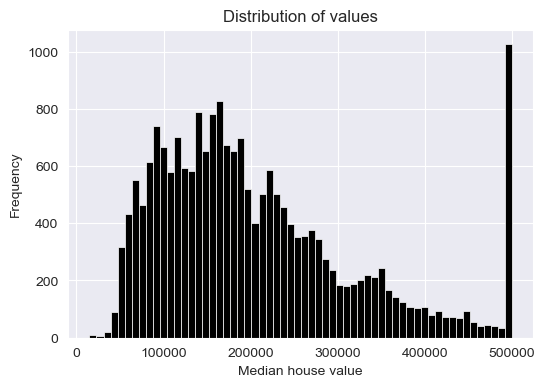

In [11]:
plt.figure(figsize=(6, 4))

sns.histplot(housing.median_house_value, bins=60, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Median house value')
plt.title('Distribution of values')

plt.show()

In [12]:
columns_numbers = list(housing.dtypes[housing.dtypes == 'float64'].index)
columns_numbers

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [13]:
df = housing.query('ocean_proximity in ["<1h_ocean", "inland"]')[columns_numbers]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [14]:
df.shape

(15687, 9)

# 1

In [15]:
list(df.columns[df.isnull().sum() > 0].values)

['total_bedrooms']

# 2

In [16]:
df['population'].median()

1195.0

In [17]:
np.random.seed(42)

l = len(df)

len_train = int(0.6 * l)
len_val = int(0.2 * l)
len_test = l - len_train - len_val

idx = np.arange(l)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:len_train].copy()
df_val = df_shuffled.iloc[len_train:len_train + len_val].copy()
df_test = df_shuffled.iloc[len_train + len_val:].copy()

y_train_orig = df_train['median_house_value'].values
y_val_orig = df_val['median_house_value'].values
y_test_orig = df_test['median_house_value'].values

y_train = np.log1p(y_train_orig)
y_val = np.log1p(y_val_orig)
y_test = np.log1p(y_test_orig)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# 3

In [18]:
# function for calculating weights of linear regression
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [19]:
# filling missings with 0
df_train_0 = df_train.fillna(0).values
df_val_0 = df_val.fillna(0).values
df_test_0 = df_test.fillna(0).values

In [20]:
# filling missings with median
train_missing_median = df_train['total_bedrooms'].median()

df_train_med = df_train.fillna(train_missing_median).values
df_val_med = df_val.fillna(train_missing_median).values
df_test_med = df_test.fillna(train_missing_median).values

In [21]:
# getting weights vector
w0_0, w_0 = train_linear_regression(df_train_0, y_train)
w0_med, w_med = train_linear_regression(df_train_med, y_train)

In [22]:
# getting predictions
y_pred_0 = w0_0 + df_train_0.dot(w_0)
y_pred_med = w0_med + df_train_med.dot(w_med)

In [23]:
# function for RMSE
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [24]:
rmse0 = round(rmse(y_train, y_pred_0), 2)

In [25]:
rmse_med = round(rmse(y_train, y_pred_med), 2)

In [26]:
print('Median is better' * (rmse0 > rmse_med)
      + 'Zeroes are better' * (rmse0 < rmse_med)
      + 'Both are equally good' * (rmse0 == rmse_med))

Both are equally good


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18036\3698507899.py:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  print('Median is better' * (rmse0 > rmse_med)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18036\3698507899.py:2: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  + 'Zeroes are better' * (rmse0 < rmse_med)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18036\3698507899.py:3: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  + 'Both are equally good' * (rmse0 == rmse_med))


# 4

In [27]:
# function for linear regression with regularization
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [28]:
r_list = [0.000001, 0.0001, 0.001, 0.01, 0.1, 0, 1, 5, 10]

In [29]:
def answer_question4(X, y, X_val, y_val, r_list):
    min_rmse = 10**10
    min_r = 10**10
    for r in r_list:
        w_0, w = train_linear_regression_reg(X, y, r)
        y_val_pred = w_0 + X_val.dot(w)
        rmse_r = round(rmse(y_val, y_val_pred), 2)
        if rmse_r < min_rmse:
            min_rmse = rmse_r
            min_r = [r]
            w0_best = w_0
            w_best = w
    return min_rmse, min_r, w0_best, w_best

In [30]:
best_rmse, min_r, w_0, w = answer_question4(df_train_0, y_train, df_val_0, y_val, r_list)

In [31]:
min_r

[1e-06]

# 5

In [32]:
def question5_answer(df, seed_list):
    val_scores = []
    for seed in seed_list:
        np.random.seed(seed)

        l = len(df)

        len_train = int(0.6 * l)
        len_val = int(0.2 * l)
        len_test = l - len_train - len_val

        idx = np.arange(l)
        np.random.shuffle(idx)

        df_shuffled = df.iloc[idx]

        df_train = df_shuffled.iloc[:len_train].copy()
        df_val = df_shuffled.iloc[len_train:len_train + len_val].copy()
        df_test = df_shuffled.iloc[len_train + len_val:].copy()

        y_train_orig = df_train['median_house_value'].values
        y_val_orig = df_val['median_house_value'].values
        y_test_orig = df_test['median_house_value'].values

        y_train = np.log1p(y_train_orig)
        y_val = np.log1p(y_val_orig)
        y_test = np.log1p(y_test_orig)

        del df_train['median_house_value']
        del df_val['median_house_value']
        del df_test['median_house_value']

        X_train = df_train.fillna(0).values
        X_val = df_val.fillna(0).values
        X_test = df_test.fillna(0).values

        w_0, w = train_linear_regression(X_train, y_train)
        y_pred = w_0 + X_val.dot(w)
        val_scores.append(rmse(y_val, y_pred))
    return val_scores

In [33]:
seed_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [34]:
val_scores = question5_answer(df, seed_list)
val_scores

[0.3377846115210822,
 0.3378066543009298,
 0.33846044731881775,
 0.3320086319057813,
 0.33944492069602683,
 0.34337807814846283,
 0.33853387112813416,
 0.34814297152954615,
 0.3512727798516247,
 0.3341662373171238]

In [35]:
print(round(np.std(val_scores), 3))

0.006


# 6

In [36]:
def question6_answer(df, seed, r):
    np.random.seed(seed)

    l = len(df)

    len_train = int(0.6 * l)
    len_val = int(0.2 * l)
    len_test = l - len_train - len_val

    idx = np.arange(l)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:len_train].copy()
    df_val = df_shuffled.iloc[len_train:len_train + len_val].copy()
    df_test = df_shuffled.iloc[len_train + len_val:].copy()

    df_train = pd.concat([df_train, df_val], ignore_index=True)

    y_train = np.log1p(df_train['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)

    del df_train['median_house_value']
    del df_test['median_house_value']

    X_train = df_train.fillna(0).values
    X_test = df_test.fillna(0).values

    w_0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w_0 + X_test.dot(w)
    return rmse(y_test, y_pred)

In [37]:
answer = question6_answer(df, 9, 0.001)

In [38]:
answer, round(answer, 2)

(0.33495446249566563, 0.33)